In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")
sd_hf = model_hf.state_dict()

for k,v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [ ]:
# Reshape the entire embedding matrix to a flat vector and display the first 20 values
sd_hf["transformer.wte.weight"].view(-1)[:20]

tensor([-0.1101, -0.0393,  0.0331,  0.1338, -0.0485, -0.0789, -0.2398, -0.0895,
         0.0253, -0.1074, -0.1811, -0.0672,  0.0739, -0.0161,  0.0117,  0.1245,
        -0.0020, -0.0815,  0.0338,  0.2365])

In [ ]:
print(sd_hf["transformer.wte.weight"].shape) #(Vocabulary size:unique tokens,  Embedding dimension)

torch.Size([50257, 768])


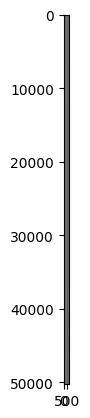

In [ ]:
# Toke embedding visualization
plt.imshow(sd_hf["transformer.wte.weight"], cmap="gray")

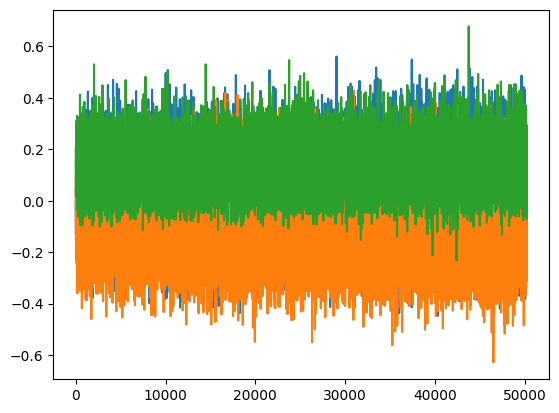

In [ ]:
# visualization of 150th dimension(150th colum) of all token embedding
plt.plot(sd_hf["transformer.wte.weight"][:,150])
plt.plot(sd_hf["transformer.wte.weight"][:,200])
plt.plot(sd_hf["transformer.wte.weight"][:,250])

In [ ]:
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are"},
 {'generated_text': "Hello, I'm a language model, not a syntax model. That's why I like it. I've done a lot of programming projects.\n"},
 {'generated_text': "Hello, I'm a language model, and I'll do it in no time!\n\nOne of the things we learned from talking to my friend"},
 {'generated_text': "Hello, I'm a language model, not a command line tool.\n\nIf my code is simple enough:\n\nif (use (string"},
 {'generated_text': "Hello, I'm a language model, I've been using Language in all my work. Just a small example, let's see a simplified example."}]

In [ ]:
class Block(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.ln_1 = nn.LayerNorm(config.n_embd)
        self.attn = MultiHeadAttention(config)
        self.ln_2 = nn.LayerNorm(config.n_embd)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torch torchvision torchaudio transformers tiktoken datasets mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 126.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install huggingface_hub
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: fineGrained).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your termin

In [ ]:
!python /content/drive/MyDrive/Llama_Medical_LLM/train_llama.py

using device: cpu
total desired batch size: 16384
=> calculated gradient accumulation steps: 1
found 11 shards for split train
found 1 shards for split val
data is ready....
config.json: 100% 614/614 [00:00<00:00, 3.31MB/s]
model.safetensors.index.json: 100% 26.8k/26.8k [00:00<00:00, 108MB/s]
model-00001-of-00002.safetensors:   0% 0.00/9.98G [00:00<?, ?B/s]
model-00001-of-00002.safetensors:   0% 10.5M/9.98G [00:00<02:22, 69.8MB/s]
model-00001-of-00002.safetensors:   0% 41.9M/9.98G [00:00<01:01, 160MB/s] 
model-00001-of-00002.safetensors:   1% 73.4M/9.98G [00:00<00:51, 193MB/s]
model-00001-of-00002.safetensors:   1% 105M/9.98G [00:00<00:47, 207MB/s] 
model-00001-of-00002.safetensors:   1% 136M/9.98G [00:00<00:45, 216MB/s]
model-00001-of-00002.safetensors:   2% 168M/9.98G [00:00<00:49, 199MB/s]
model-00001-of-00002.safetensors:   2% 199M/9.98G [00:01<00:49, 199MB/s]
model-00001-of-00002.safetensors:   2% 231M/9.98G [00:01<00:47, 206MB/s]
model-00001-of-00002.safetensors:   3% 262M/9.98G 

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [ ]:
import numpy as np
import os
import torch

# Define the data root and tokenizer
data_root = "/content/drive/MyDrive/Medical_LLM/medical_dataset_cache"

# Initialize variables to track the maximum token ID
max_token_id = 0

# Loop over all data shards
for shard_filename in os.listdir(data_root):
    if shard_filename.endswith('.npy'):  # assuming tokens are stored in .npy format
        # Load token shard
        shard_path = os.path.join(data_root, shard_filename)
        tokens = np.load(shard_path)

        # Find the maximum token ID in this shard
        shard_max_token_id = tokens.max()
        print(f"Max token ID in {shard_filename}: {shard_max_token_id}")

        # Update the overall maximum token ID if this shard has a higher value
        if shard_max_token_id > max_token_id:
            max_token_id = shard_max_token_id

print(f"Overall maximum token ID in the dataset: {max_token_id}")

# Check if it exceeds the vocab size
vocab_size = 22731  # set this to the vocab size defined in GPTConfig
if max_token_id >= vocab_size:
    print(f"Warning: Maximum token ID {max_token_id} exceeds the vocab size {vocab_size}.")
else:
    print("All token IDs are within the vocabulary range.")

Max token ID in medical_val_000000.npy: 50256
Max token ID in medical_train_000001.npy: 50256
Max token ID in medical_train_000002.npy: 50256
Max token ID in medical_train_000003.npy: 50256
Max token ID in medical_train_000004.npy: 50256
Max token ID in medical_train_000005.npy: 50256
Max token ID in medical_train_000006.npy: 50256
Max token ID in medical_train_000007.npy: 50256
Max token ID in medical_train_000008.npy: 50256
Max token ID in medical_train_000009.npy: 50256
Max token ID in medical_train_000010.npy: 50256
Overall maximum token ID in the dataset: 50256


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.6 MB/s eta 0:00:00


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
!python /content/drive/MyDrive/Medical_LLM/train_gpt2.py

Streaming output truncated to the last 5000 lines.
step 17422 | loss: 0.008090 | lr 7.0705e-05 | norm: 0.1008 | dt: 178.51ms | tok/sec: 91781.02
start training the model
step 0 of training
step 17423 | loss: 0.005475 | lr 7.0692e-05 | norm: 0.0935 | dt: 181.25ms | tok/sec: 90394.32
start training the model
step 0 of training
step 17424 | loss: 0.005372 | lr 7.0679e-05 | norm: 0.0914 | dt: 178.64ms | tok/sec: 91712.91
start training the model
step 0 of training
step 17425 | loss: 0.005326 | lr 7.0666e-05 | norm: 0.0698 | dt: 178.42ms | tok/sec: 91830.69
start training the model
step 0 of training
step 17426 | loss: 0.006384 | lr 7.0654e-05 | norm: 0.1127 | dt: 178.73ms | tok/sec: 91670.34
start training the model
step 0 of training
step 17427 | loss: 0.007071 | lr 7.0641e-05 | norm: 0.1248 | dt: 182.23ms | tok/sec: 89906.01
start training the model
step 0 of training
step 17428 | loss: 0.006308 | lr 7.0628e-05 | norm: 0.0883 | dt: 180.06ms | tok/sec: 90993.02
start training the model
st

In [ ]:
!pip install flask pyngrok nest_asyncio

In [ ]:
pip install torch

In [ ]:
!ngrok authtoken 2lEXyQpA4Sexnri0id9pzhSZs1U_5bwcKB6BxqWM2FZKAxN7h

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!python /content/drive/MyDrive/Medical_LLM/app.py

Starting application...
Current working directory: /content
Checking if model file exists: False
Loading model...
Using device: cpu
Loading model from: /content/drive/MyDrive/Medical_LLM/medical_dataset_cache/saved_model.pth
/content/drive/MyDrive/Medical_LLM/app.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use c

In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 134.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.5 MB/s eta 0:00:00


In [ ]:
public_url = ngrok.connect(addr='8501')
print(f"Streamlit app is live at: {public_url}")


NameError: name 'ngrok' is not defined

In [ ]:
!streamlit run app.py &> streamlit.log &

In [ ]:
import time
from pyngrok import ngrok

# Wait for Streamlit to start
time.sleep(5)

In [ ]:
!streamlit run app.py &> /dev/null &

In [ ]:
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")

Streamlit app is live at: NgrokTunnel: "https://c703-35-245-71-252.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!pip install colabcode


Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this version.
INFO: pip is looking at multiple versions of colabcode to determine which version is compatible with other requirements. This could take a while.
  Using cached uvicorn-0.13.1-py3-none-any.whl.metadata (4.6 kB)
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this versio

In [ ]:
!python /content/drive/MyDrive/Medical_LLM/app.py

2024-10-29 20:51:04.275 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-29 20:51:04.314 
  command:

    streamlit run /content/drive/MyDrive/Medical_LLM/app.py [ARGUMENTS]
2024-10-29 20:51:04.314 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-29 20:51:04.314 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-29 20:51:04.314 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
streamlit run /content/drive/MyDrive/Medical_LLM/app.py

SyntaxError: invalid syntax (<ipython-input-12-36b198c83b89>, line 1)

In [ ]:
!pip install streamlit
!npm install -g localtunnel


added 22 packages, and audited 23 packages in 1s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

your url is: https://four-regions-make.loca.lt
^C


In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.91.70.44


In [ ]:
!pip install -q streamlit

In [ ]:
!npm install localtunnel


up to date, audited 23 packages in 508ms

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
%%writefile apptest.py

import streamlit as st

st.write('Hello, *World!* :sunglasses:')

Writing apptest.py


In [ ]:
!npx localtunnel --port 8501

your url is: https://cuddly-seals-matter.loca.lt
/content/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:15433 (check your firewall settings)
    at Socket.<anonymous> (/content/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:513:28)
    at emitErrorNT (node:internal/streams/destroy:157:8)
    at emitErrorCloseNT (node:internal/streams/destroy:122:3)
    at processTicksAndRejections (node:internal/process/task_queues:83:21)


In [ ]:
import os

myfile = "G:\My Drive\Medical_LLM\medical_dataset_cache"
# If file exists, delete it.
if os.path.isfile(myfile):
    os.remove(myfile)
else:
    # If it fails, inform the user.
    print("Error: %s file not found" % myfile)

In [ ]:
data_path = '/content/drive/MyDrive/Medical_LLM/output_data/Medical_QA_Dataset.txt'

with open(data_path, 'r', encoding='utf-8') as f:
    text = f.read()
dataset = text[:1000]
print(dataset[:100])

Question: What is (are) Hypothalamic dysfunction ?
Answer: Hypothalamic dysfunction refers to a cond


In [ ]:
!python /content/drive/MyDrive/Medical_LLM/train_gpt2.py

using device: cuda
loaded 10638625 tokens
1 epoch = 649 batches
Traceback (most recent call last):
  File "/content/drive/MyDrive/Medical_LLM/train_gpt2.py", line 235, in <module>
    logits, loss = model(x, y)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1553, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1562, in _call_impl
    return forward_call(*args, **kwargs)
  File "/content/drive/MyDrive/Medical_LLM/train_gpt2.py", line 121, in forward
    x = block(x)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1553, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1562, in _call_impl
    return forward_call(*args, **kwargs)
  File "/content/drive/MyDrive/Medical_LLM/train_gpt2.py", line 67, in forward
    x = x + self.at

Min Train Loss: 0.002344
Min Validation Loss: 0.1365


KeyError: 'hella'

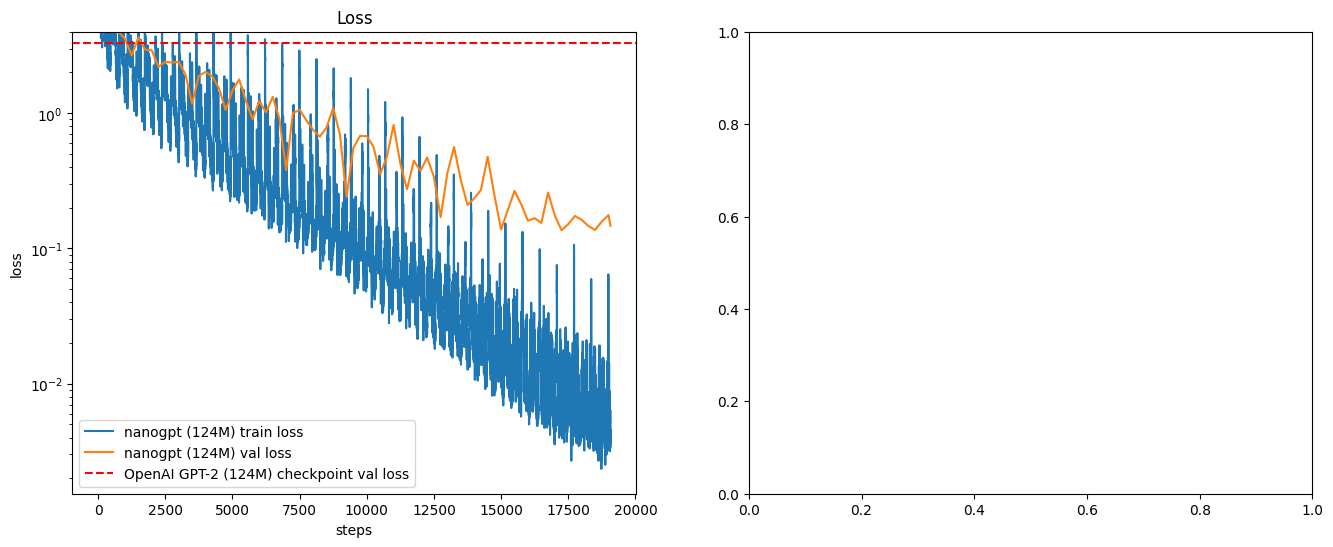

In [1]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sz = "124M"

loss_baseline = {
    "124M": 3.2924,
}[sz]
hella2_baseline = { # HellaSwag for GPT-2
    "124M": 0.294463,
    "350M": 0.375224,
    "774M": 0.431986,
    "1558M": 0.488946,
}[sz]
hella3_baseline = { # HellaSwag for GPT-3
    "124M": 0.337,
    "350M": 0.436,
    "774M": 0.510,
    "1558M": 0.547,
}[sz]

# load the log file
with open("G:\My Drive\Medical_LLM\medical_dataset_cache\log\log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(16, 6))

# Panel 1: losses: both train and val
plt.subplot(121)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'nanogpt ({sz}) train loss')
print("Min Train Loss:", min(ys))
xs, ys = streams_xy["val"] # validation loss
plt.plot(xs, ys, label=f'nanogpt ({sz}) val loss')
# horizontal line at GPT-2 baseline
if loss_baseline is not None:
    plt.axhline(y=loss_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint val loss")
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.ylim(top=4.0)
plt.legend()
plt.title("Loss")
print("Min Validation Loss:", min(ys))

# Panel 2: HellaSwag eval
plt.subplot(122)
xs, ys = streams_xy["hella"] # HellaSwag eval
ys = np.array(ys)
plt.plot(xs, ys, label=f"nanogpt ({sz})")
# horizontal line at GPT-2 baseline
if hella2_baseline:
    plt.axhline(y=hella2_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint")
if hella3_baseline:
    plt.axhline(y=hella3_baseline, color='g', linestyle='--', label=f"OpenAI GPT-3 ({sz}) checkpoint")
plt.xlabel("steps")
plt.ylabel("accuracy")
plt.legend()
plt.title("HellaSwag eval")
print("Max Hellaswag eval:", max(ys))

In [2]:
print(streams_xy.keys())

dict_keys(['val', 'train'])
